# Desarrollo tarea 3
logistic regression

Grupo 74


## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [633]:
#Se cargan las bibliotecas necesarias

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, auc
from sklearn.preprocessing import StandardScaler


In [465]:
Datos = pd.read_csv("C:/Users/57320/Documents/UNAD/Analisis de datos/Tarea3/heartdisease/heart_cleveland_upload.csv")

In [469]:
Datos.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [471]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


valor inferior: 29
valor superior: 77


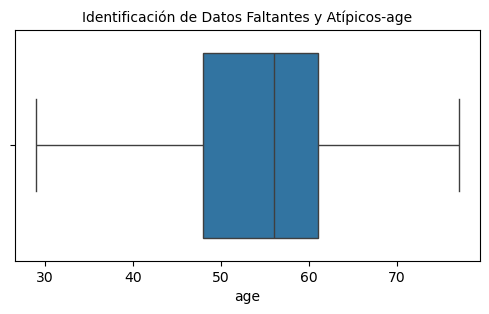

In [473]:
valores = Datos['age']
plt.figure(figsize=(6, 3))
sns.boxplot(x=valores)
plt.title('Identificación de Datos Faltantes y Atípicos-age', fontsize=10 )

#calculo cuartiles
quartiles = np.percentile(valores, [25, 50, 75])  
iqr = quartiles[2] - quartiles[0] 

lower_whisker = max(min(valores), quartiles[0] - 1.5 * iqr)
upper_whisker = min(max(valores), quartiles[2] + 1.5 * iqr)
print("valor inferior: "+str(lower_whisker))
print("valor superior: "+str(upper_whisker))

valor inferior: 94
valor superior: 170.0


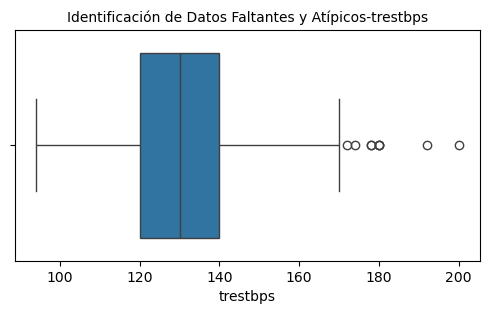

In [87]:
valores = Datos['trestbps']
plt.figure(figsize=(6, 3))
sns.boxplot(x=valores)
plt.title('Identificación de Datos Faltantes y Atípicos-trestbps', fontsize=10 )

quartiles = np.percentile(valores, [25, 50, 75])  # Q1, Mediana (Q2), Q3
iqr = quartiles[2] - quartiles[0]  # IQR = Q3 - Q1

lower_whisker = max(min(valores), quartiles[0] - 1.5 * iqr)
upper_whisker = min(max(valores), quartiles[2] + 1.5 * iqr)
print("valor inferior: "+str(lower_whisker))
print("valor superior: "+str(upper_whisker))

valor inferior: 126
valor superior: 373.5


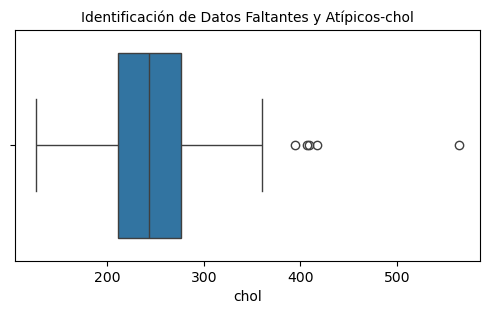

In [475]:
valores = Datos['chol']
plt.figure(figsize=(6, 3))
sns.boxplot(x=valores)
plt.title('Identificación de Datos Faltantes y Atípicos-chol', fontsize=10 )

quartiles = np.percentile(valores, [25, 50, 75])  # Q1, Mediana (Q2), Q3
iqr = quartiles[2] - quartiles[0]  # IQR = Q3 - Q1

lower_whisker = max(min(valores), quartiles[0] - 1.5 * iqr)
upper_whisker = min(max(valores), quartiles[2] + 1.5 * iqr)
print("valor inferior: "+str(lower_whisker))
print("valor superior: "+str(upper_whisker))


valor inferior: 94
valor superior: 170.0


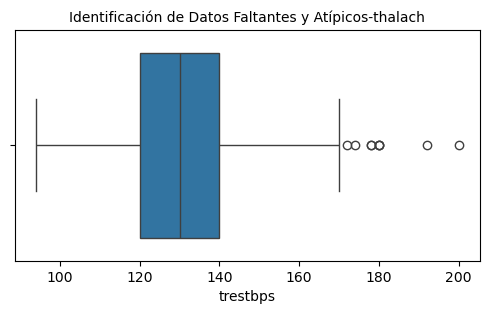

In [477]:
valores = Datos['trestbps']
plt.figure(figsize=(6, 3))
sns.boxplot(x=valores)
plt.title('Identificación de Datos Faltantes y Atípicos-thalach', fontsize=10 )

quartiles = np.percentile(valores, [25, 50, 75])  # Q1, Mediana (Q2), Q3
iqr = quartiles[2] - quartiles[0]  # IQR = Q3 - Q1

lower_whisker = max(min(valores), quartiles[0] - 1.5 * iqr)
upper_whisker = min(max(valores), quartiles[2] + 1.5 * iqr)
print("valor inferior: "+str(lower_whisker))
print("valor superior: "+str(upper_whisker))


valor inferior: 0.0
valor superior: 4.0


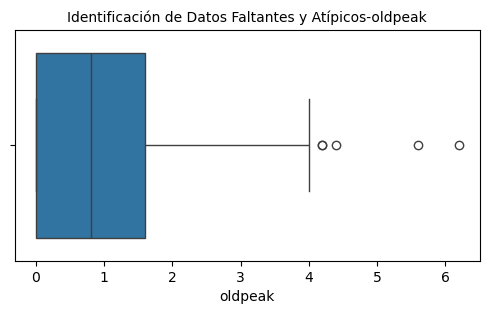

In [479]:
valores = Datos['oldpeak']
plt.figure(figsize=(6, 3))
sns.boxplot(x=valores)
plt.title('Identificación de Datos Faltantes y Atípicos-oldpeak', fontsize=10 )

quartiles = np.percentile(valores, [25, 50, 75])  # Q1, Mediana (Q2), Q3
iqr = quartiles[2] - quartiles[0]  # IQR = Q3 - Q1

lower_whisker = max(min(valores), quartiles[0] - 1.5 * iqr)
upper_whisker = min(max(valores), quartiles[2] + 1.5 * iqr)
print("valor inferior: "+str(lower_whisker))
print("valor superior: "+str(upper_whisker))


A continuación se realizan histogramas de variables numéricas

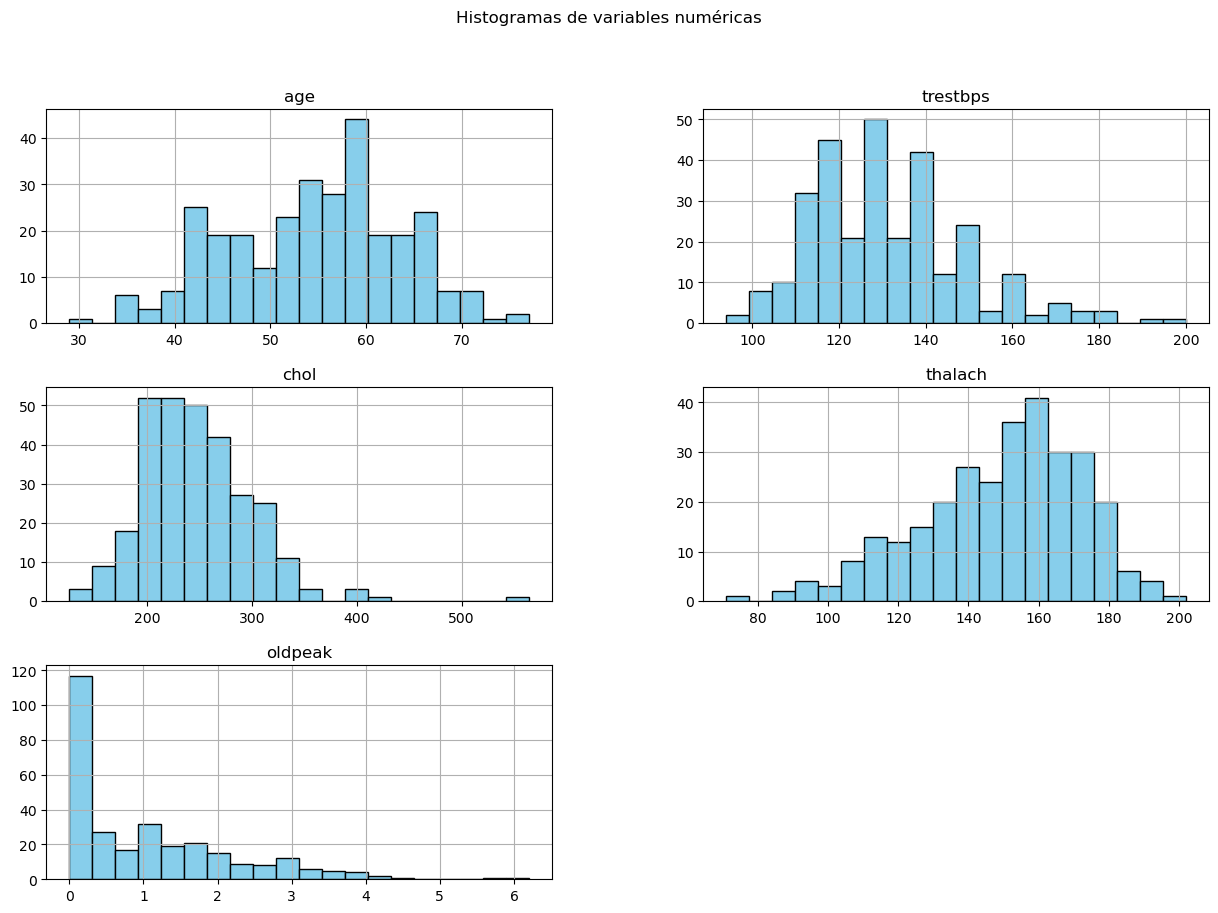

In [482]:
variables_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
variables = ['age','sex', 'cp','trestbps', 'chol', 'thalach', 'oldpeak']
variables = [	'age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal']
# Histograma de variables numéricas
Datos[variables_numericas].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogramas de variables numéricas")
plt.show()

C:\Users\57320\AppData\Local\Temp\ipykernel_32024\3680402927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Datos[var], palette="viridis")
C:\Users\57320\AppData\Local\Temp\ipykernel_32024\3680402927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Datos[var], palette="viridis")
C:\Users\57320\AppData\Local\Temp\ipykernel_32024\3680402927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Datos[var], palette="viridis")
C:\Users\57320\AppData\Local\Temp\ipykernel_32024\3680402927.py:7: FutureWarning: 

Passing `palette` w

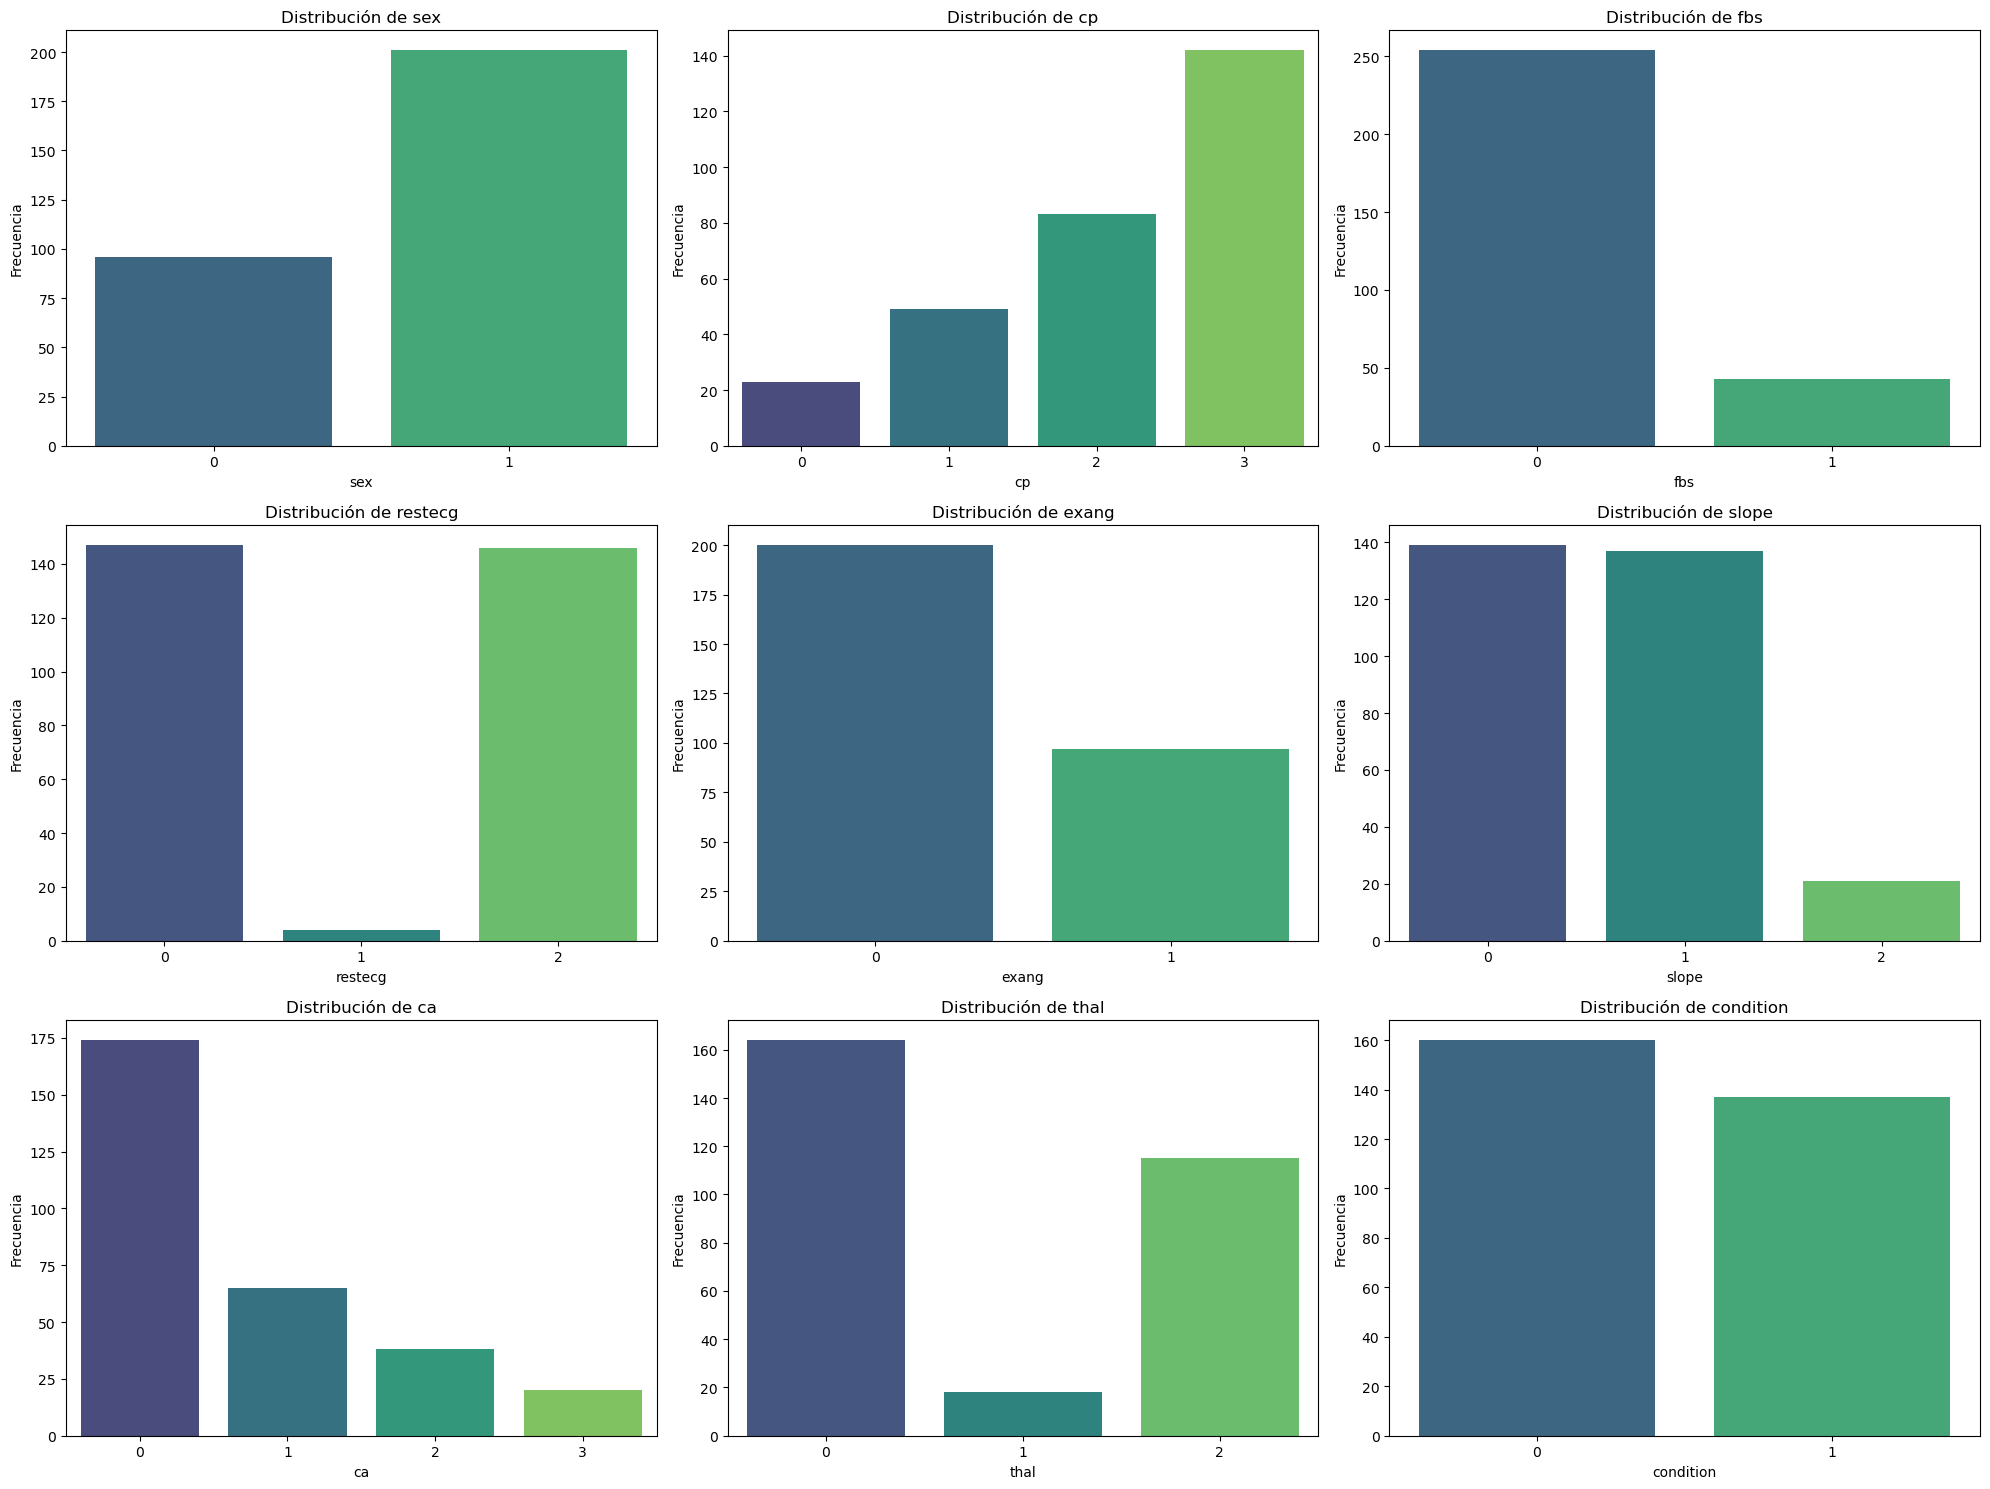

In [484]:
variables_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition']

# Gráficos de barras para variables categóricas
plt.figure(figsize=(20, 15))
for i, var in enumerate(variables_categoricas, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=Datos[var], palette="viridis")
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

Matriz de correlación entre variables numéricas

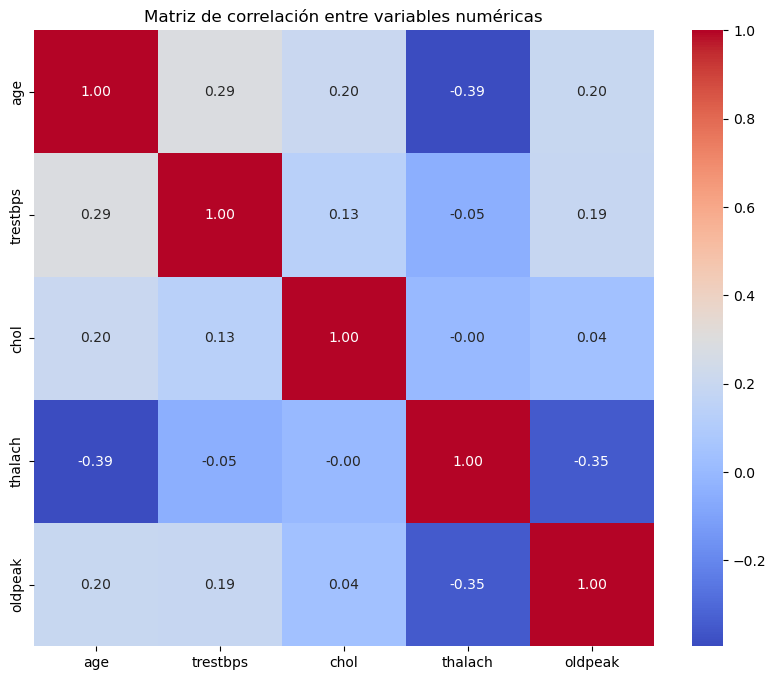

In [487]:

plt.figure(figsize=(10, 8))
correlacion = Datos[variables_numericas].corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

In [137]:
print("Cantidad de valores nulos por columna:")
print(Datos.isnull().sum())

Cantidad de valores nulos por columna:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 


In [489]:
print("Cantidad de Registros con cero en edad: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en presión arterial en reposo: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol en sangre: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada: ",Datos['thalach'].isin([0]).sum())

Cantidad de Registros con cero en edad:  0
Cantidad de Registros con cero en presión arterial en reposo:  0
Cantidad de Registros con cero en Colesterol en sangre:  0
Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada:  0


In [152]:
nivel_minimo=125
nivel_maximo=380

Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 5


In [156]:
# Reemplazar valores menores que el límite inferior con el límite inferior
Datos['chol'] = np.where(Datos['chol'] < nivel_minimo, nivel_minimo, Datos['chol'])

In [158]:
# Reemplazar valores mayores que el límite superior con el límite superior
Datos['chol'] = np.where(Datos['chol'] > nivel_maximo, nivel_maximo, Datos['chol'])



In [160]:
nivel_minimo=125
nivel_maximo=380

Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [491]:
nivel_minimo= 70 #94
nivel_maximo= 220 #170.0
Total_Atipicos=((Datos['thalach']<nivel_minimo)|(Datos['thalach']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [552]:
nivel_minimo=0
nivel_maximo=6

Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 1


In [554]:
# Reemplazar valores mayores que el límite superior con el límite superior
Datos['oldpeak'] = np.where(Datos['oldpeak'] > nivel_maximo, nivel_maximo, Datos['oldpeak'])

In [556]:
nivel_minimo=0
nivel_maximo=6

Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


## 3. Selección de características

In [558]:
from sklearn.feature_selection import SelectKBest, f_classif


Puntuación de cada característica (ANOVA F-test):
   Característica  Puntuación
0             age   16.038097
1             sex   24.798347
2              cp   59.241915
3        trestbps    7.117646
4            chol    1.913800
5             fbs    0.002959
6         restecg    8.394987
7         thalach   64.589855
8           exang   63.680253
9         oldpeak   64.841114
10          slope   36.804300
11             ca   80.577866
12           thal  109.629171


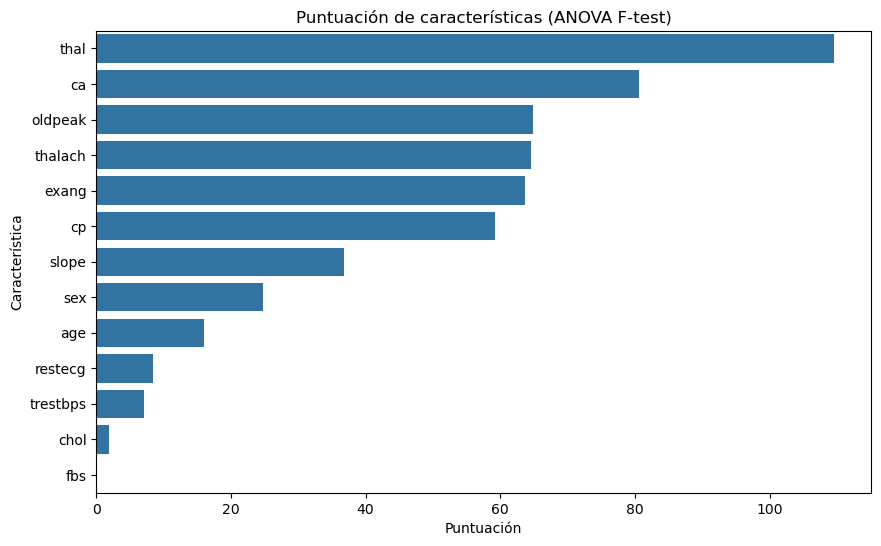

In [560]:
# Separar las características (X) y la variable objetivo (y)
X = Datos.drop('condition', axis=1)
y = Datos['condition']

# Selección univariante de características usando ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

# Crear un DataFrame con las puntuaciones
feature_scores = pd.DataFrame({'Característica': X.columns, 'Puntuación': scores})
print("Puntuación de cada característica (ANOVA F-test):")
print(feature_scores)

# Graficar las puntuaciones
plt.figure(figsize=(10, 6))
sns.barplot(x='Puntuación', y='Característica', data=feature_scores.sort_values(by='Puntuación', ascending=False))
plt.title("Puntuación de características (ANOVA F-test)")
plt.show()

In [561]:
from sklearn.ensemble import ExtraTreesClassifier



Importancia de cada característica (ExtraTreesClassifier):
   Característica  Importancia
0             age     0.074106
1             sex     0.047591
2              cp     0.108704
3        trestbps     0.063361
4            chol     0.059832
5             fbs     0.021733
6         restecg     0.033934
7         thalach     0.081929
8           exang     0.088485
9         oldpeak     0.082795
10          slope     0.062397
11             ca     0.124422
12           thal     0.150710


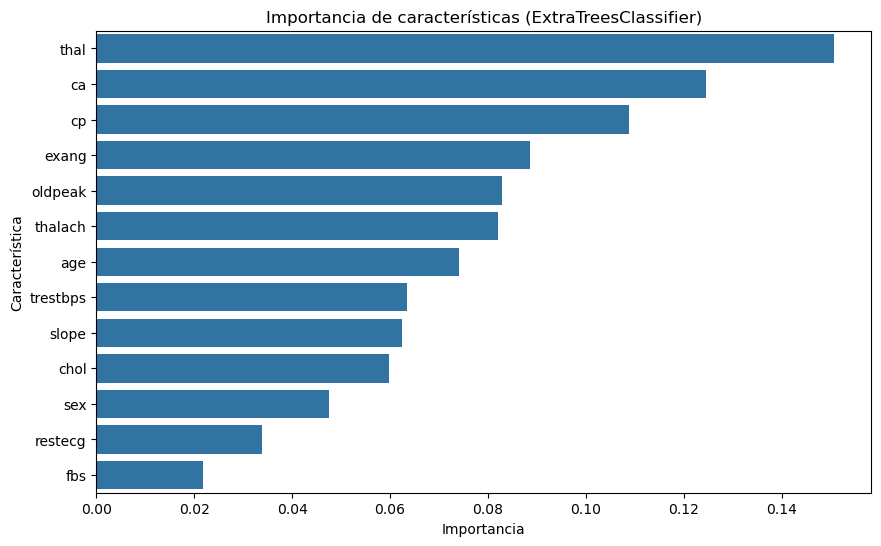

In [564]:
# Selección de características usando la importancia de un modelo ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)
importances = model.feature_importances_

# Crear un DataFrame con la importancia de las características
feature_importances = pd.DataFrame({'Característica': X.columns, 'Importancia': importances})
print("\nImportancia de cada característica (ExtraTreesClassifier):")
print(feature_importances)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importances.sort_values(by='Importancia', ascending=False))
plt.title("Importancia de características (ExtraTreesClassifier)")
plt.show()

In [565]:
X= X.drop('fbs', axis=1)

In [567]:
Datos['condition'].value_counts()


condition
0    160
1    137
Name: count, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [571]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 0)


In [573]:
print (X_train.head())


     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
261   51    1   3       140   261        2      186      1      0.0      0   
121   51    0   2       140   308        2      142      0      1.5      0   
12    59    1   0       134   204        0      162      0      0.8      0   
141   44    1   2       120   226        0      169      0      0.0      0   
29    62    1   1       128   208        2      140      0      0.0      0   

     ca  thal  
261   0     0  
121   1     0  
12    2     0  
141   0     0  
29    0     0  


In [575]:
print (X_test.head())


     age  sex  cp  trestbps  chol  restecg  thalach  exang  oldpeak  slope  \
129   49    1   2       118   149        2      126      0      0.8      0   
7     61    1   0       134   234        0      145      0      2.6      1   
162   67    1   3       125   254        0      163      0      0.2      1   
183   63    1   3       130   330        2      132      1      1.8      0   
264   50    1   3       144   200        2      126      1      0.9      1   

     ca  thal  
129   3     0  
7     2     0  
162   2     2  
183   3     2  
264   0     2  


In [576]:
len(X_train)

237

In [579]:
len(X_test)

60

In [581]:
len(y_train)

237

In [583]:
len(y_test)

60

## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [586]:
# Construir el modelo de regresión logística 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_regresion = LogisticRegression(solver="lbfgs", 
                                      max_iter=500,  
                                      random_state=42)

modelo_regresion.fit (X_train_scaled , y_train)   



LogisticRegression(max_iter=500, random_state=42)

In [588]:
# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test_scaled) # la función predict predice los valores a partir del conjunto de datos de validación

In [590]:
X_test.head(10)


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
129,49,1,2,118,149,2,126,0,0.8,0,3,0
7,61,1,0,134,234,0,145,0,2.6,1,2,0
162,67,1,3,125,254,0,163,0,0.2,1,2,2
183,63,1,3,130,330,2,132,1,1.8,0,3,2
264,50,1,3,144,200,2,126,1,0.9,1,0,2
263,50,1,3,150,243,2,128,0,2.6,1,0,2
279,44,1,3,120,169,0,144,1,2.8,2,0,1
35,57,1,1,154,232,2,164,0,0.0,0,1,0
280,44,1,3,112,290,2,153,0,0.0,0,1,0
224,57,1,3,150,276,2,112,1,0.6,1,1,1


In [592]:
y_test.head(20)


129    1
7      1
162    1
183    1
264    1
263    1
279    1
35     1
280    1
224    1
272    0
177    0
111    0
97     0
255    1
51     0
211    1
117    0
151    0
249    0
Name: condition, dtype: int64

In [594]:
print (Prediccion)

[1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [598]:
print(classification_report(y_test,Prediccion))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.86      0.86      0.86        28

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

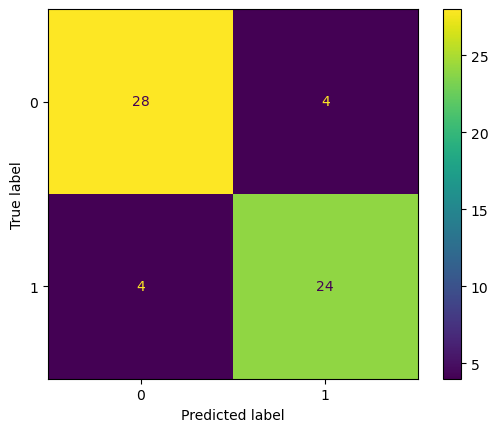

In [602]:
#Matriz de confusión

cm=confusion_matrix(y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

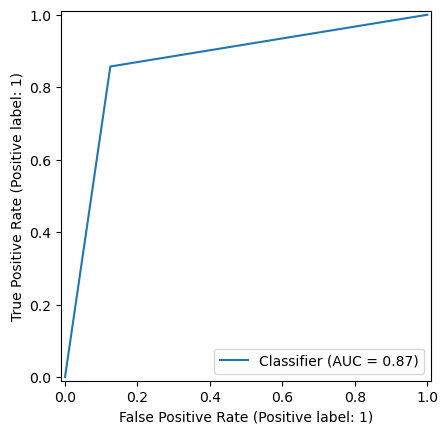

In [625]:
# Curva ROC

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()

In [606]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve


In [608]:
y_prob = modelo_regresion.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase positiva


0.9142587696114338


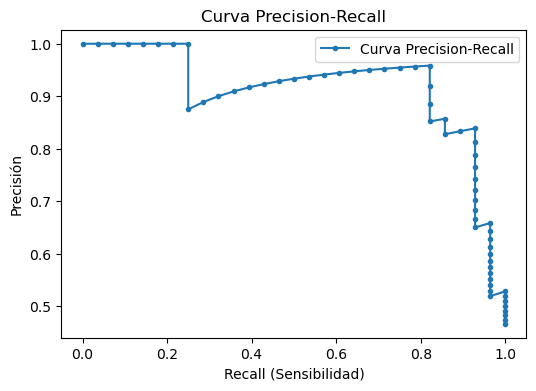

In [635]:
#  Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

auc_pr = auc(recall, precision)
print(auc_pr)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label="Curva Precision-Recall")
plt.xlabel("Recall (Sensibilidad)")
plt.ylabel("Precisión")
plt.title("Curva Precision-Recall")
plt.legend()
plt.show()



## 8. Interpretar, analizar y documentar los resultados obtenidos

### Limpieza y preprocesamiento de datos:

Para este paso se realizó el análisis por separado entre variables numéricas y variables categóricas.

En cuanto a variables numéricas se identificaron algunos outliers, para esto se realizó una pequeña investigación sobre valores normales a nivel médico y se utilizaron boxplots para la identificación de outliers. También se utilizaron gráficos de barras en variables categóricas para analizar su distribución.

Respecto a las variables numéricas se encontraron valores atípicos según los boxplot. Sin embargo, al comparar con los valores médicos posibles, se puede envidenciar que en la practica algunos de estos no son atípicos y un paciente los puede presentar. Teniendo en cuenta los dos boxplots (chol, oldpeak), se identificaron valores atípicos en chol que corresponde a una medición del colesterol y a oldpeak que corresponde a la depresión del segmento ST. Para corregir estos datos se utilizaron valores de acuerdo a lo arrojado por los boxplot y a los valores posibles presentados en pacientes.

Algo a destacar en los datos obtenidos, es que no tenian valores null. En las columnas numéricas, no se encontraron valores menores a los que realmente podria presentar un paciente. 

En la matrízde correlación se pudo observar que algunas variables guardan una correlación moderada como lo son la edad y la frecuencia cardiaca máxima (thalac). Esto mismo se presentón entre oldpeak y thalac.


### Selección de características

Para este análisis se utilizaron módulos de sklearn que nos permiten analizar cuales características son las que menos contribuyen a la tarea de clasificación. Se encontró que **fps** aporta muy poco a la tarea actual como se puede evidenciar en la sección 3. Es por esta razón que se procedió a eliminar dicha columna. 

Las características que más aportan para esta tarea fueron: **thal** y **ca**.

### Entrenamiento y prueba del modelo

Para el entrenamiento se dividó el dataset entre train y test. Para train se le asignó el 80%, y para test el 20% de los datos.

El algoritmo utilizado fue logistic regression obteniendo los siguientes resultados:

**Accuracy:** Métrica de encargada en medir la cantidad de aciertos generados por el modelo a partir del dataset de prueba, sin discriminar cuál clase se está analizando. En este caso, en el análisis de la condición de enfermedad del corazón se logró un accuracy del 87%.

**Precisión:** Métrica encargada de calcular la proporción de verdaderos positivos entre todos los positivos predichos por el modelo. En este caso, el 86% de los predichos por el modelo con enfermedad cardiaca en realidad tenían tal condición.

**Recall:** Métrica encargada de calcular la proporción de verdaderos positivos entre todos los positivos presentes en el conjunto de prueba. En este caso, se detectó el 86% de todos los pacientes con condición de enfermedad del corazón en el dataset de prueba. 

**F1 Score:** Esta métrica realiza una media armónica de precisión y recall. Es decir, realiza un cálculo buscando un equilibrio entre estas; para este ejercicio se obtuvo un valor de 86%, lo que nos indica que nuestra precision y recall están en equilibrio.

**Matriz de confusión:** Observando la matriz de confusión, podemos ver que para la clase "**condition**" existieron 4 falsos positivos  y 4 falsos negativos. Es decir, estos fueron errores detectados. Los valores en la diagonal son los verdaderos positivos (28) y verdaderos negativos (24) son correctos.

**Curva ROC y AUC:** La curva ROC muestra qué tan bien un modelo distingue entre dos grupos al variar su criterio de decisión, teniendo en cuenta la tasa de verdaderos positivos y la tasa de falsos positivos. El AUC resume esta curva en un solo número: qué tan probable es que el modelo clasifique correctamente un ejemplo aleatorio de cada grupo. Un AUC cercano a **1** significa que el modelo es muy bueno discriminando. Para este problema, se obtuvo un AUC de **0.87** sobre nuestra clase "**condition**".

**Curva precision recall:**  Grafica la Precisión (de todas las instancias que predijo como positivas, ¿cuántas fueron realmente positivas?) contra el Recall (de todas las instancias que realmente son positivas, ¿cuántas identificó correctamente?). En este caso, el clasificador sobre la clase "**condition**" se acerca a la esquina superior derecha, lo que nos indica que tiene un buen rendimiento. Si calculamos el AUC de esta curva tenemos un 91%.